<a href="https://colab.research.google.com/github/nrarifahmed/eda/blob/main/Heart_Attack_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pypi.org/project/pandas-profiling/


https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html


https://www.kaggle.com/mehulpatole31/heart-attack-eda-prediction

https://pypi.org/project/chart-studio/

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
  Value 0: typical angina
  Value 1: atypical angina
  Value 2: non-anginal pain
  Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
!nvidia-smi

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv


/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

### Chart Studio EDA 

https://pypi.org/project/chart-studio/


In [ ]:
!pip install chart-studio

In [ ]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")




In [ ]:
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/heart.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(df.corr(),annot= True)
plt.show()

In [ ]:
ax= px.histogram(df,x= "age", template= "plotly_dark",color= "output",title='Age distribution')
ax.show()

In [ ]:
ax= px.pie(df, names= "output",template= "plotly_dark",title= "chances of heart attack",hole= 0.5)
ax.show()

In [ ]:
# Chest pain types
#    Value 0: typical angina
#    Value 1: atypical angina
#    Value 2: non-anginal pain
#    Value 3: asymptomatic


ax= px.pie(df, names= "cp",template= "plotly_dark",title= " Chest pain types ",hole=.7)
ax.show()

In [ ]:
ax = px.scatter(df, x="age", y="trtbps",size="trtbps", color="output",
                size_max=20,template= "plotly_dark",title="resting blood pressure/age correlation")
ax.show()

In [ ]:
ax= px.scatter(df,x= "age",y= "chol",marginal_x='histogram', marginal_y='histogram',size="chol", size_max=20,
              template= "plotly_dark",color= "output",title="age and cholestrol correlation")
ax.show()

In [ ]:
ax = px.scatter_3d(df, x="age", y="trtbps", z="chol",template= "plotly_dark",color="output")
ax.show()

In [ ]:
fig = px.histogram(df, x='thalachh', color="output",title= "maximum heart rate achieved",template= "plotly_dark")
fig.show()

In [ ]:
## CLASSIFICATION PART

In [56]:
#importing essential libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [57]:
df.var()

age         0.030655
sex         0.217166
cp          1.065132
trtbps      0.016950
chol        0.041538
fbs         0.126877
restecg     0.276528
thalachh    0.027143
exng        0.220707
oldpeak     1.348095
slp         0.379735
caa         1.045724
thall       0.374883
output      0.248836
dtype: float64

The age ,trtbps,chol,thalach have higher levels of variance hence needs to be normalized

In [58]:
#Using log transformation to do Normal Distribution
df["age"]= np.log(df.age)
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)

In [59]:
df.var()

age         0.001993
sex         0.217166
cp          1.065132
trtbps      0.000710
chol        0.001382
fbs         0.126877
restecg     0.276528
thalachh    0.001128
exng        0.220707
oldpeak     1.348095
slp         0.379735
caa         1.045724
thall       0.374883
output      0.248836
dtype: float64

all features are now normally distributed

In [60]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,1.380547,0.683168,0.966997,1.583026,1.701422,0.148515,0.528053,1.607973,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.044645,0.466011,1.032052,0.026651,0.037178,0.356198,0.525860,0.033584,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,1.214110,0.000000,0.000000,1.513652,1.576146,0.000000,0.000000,1.449898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350838,0.000000,0.000000,1.566007,1.677444,0.000000,0.000000,1.588029,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.388126,1.000000,1.000000,1.582588,1.701222,0.000000,1.000000,1.615507,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.413636,1.000000,2.000000,1.597698,1.725433,0.000000,1.000000,1.631588,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.468751,1.000000,3.000000,1.667389,1.846098,1.000000,2.000000,1.669266,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
#train test split
label= df["output"]
train= df.drop("output",axis= 1)

In [62]:
x_train,x_test,y_train,y_test= train_test_split(train,label,test_size= 0.2,random_state= 4)

In [63]:
### Logistic Regression
lr= LogisticRegression()
lr.fit(x_train,y_train)
lrpred= lr.predict(x_test)
acc_LR = accuracy_score(y_test,lrpred)
print('The Accuracy Score for Logistic Regression :', acc_LR)

The Accuracy Score for Logistic Regression : 0.8688524590163934


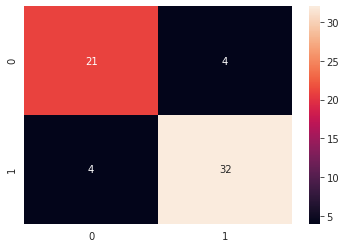

In [67]:
#confusion matrix
cm= confusion_matrix(y_test,lrpred)
sns.heatmap(cm,annot= True)

In [68]:
#classification report
classification_report(y_test,lrpred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.84      0.84        25\n           1       0.89      0.89      0.89        36\n\n    accuracy                           0.87        61\n   macro avg       0.86      0.86      0.86        61\nweighted avg       0.87      0.87      0.87        61\n'

In [69]:
## **RANDOM FOREST CLASSIFIER
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred= rf.predict(x_test)
acc_RF = accuracy_score(y_test,rfpred)
print('The Accuracy Score for Random Forest Classifier :', acc_RF)

The Accuracy Score for Random Forest Classifier : 0.8688524590163934


In [70]:
### Decision Tree Classifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc= dc.predict(x_test)
acc_DT = accuracy_score(y_test,preddc)
print('The Accuracy Score for Decision Tree Classifier :', acc_DT)


The Accuracy Score for Decision Tree Classifier : 0.819672131147541


In [71]:
#parameter tuning
dc= DecisionTreeClassifier()
params= {'criterion':['gini','entropy'],'max_depth':[1,3,10,50,100,200]}
grid = GridSearchCV(dc,params, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [72]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 200}

In [ ]:
grid.best_score_

In [73]:
### AdaBoostClassifier**
ad=AdaBoostClassifier(learning_rate= 0.2,n_estimators= 100)
ad.fit(x_train,y_train)
adpred= ad.predict(x_test)
acc_AdaBoost = accuracy_score(y_test,adpred)
print('The Accuracy Score for AdaBoostClassifier :', acc_AdaBoost)

The Accuracy Score for AdaBoostClassifier : 0.8688524590163934


In [74]:
## GradientBoostingClassifier**
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb= gb.predict(x_test)
acc_GradientBoost= accuracy_score(y_test,xgb.predict(x_test))
print('The Accuracy Score for GradientBoost :', acc_GradientBoost)

The Accuracy Score for GradientBoost : 0.8360655737704918


In [75]:
### XGBOOST**
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
acc_XGboost = accuracy_score(y_test,xgb.predict(x_test))
print('The Accuracy Score for XGBoost :', acc_XGboost)

The Accuracy Score for XGBoost : 0.9016393442622951


In [77]:
print('The Accuracy Score for Logistic Regression       :', acc_LR)
print('The Accuracy Score for Random Forest Classifier  :', acc_RF)
print('The Accuracy Score for Decision Tree Classifier  :', acc_DT)
print('The Accuracy Score for AdaBoostClassifier        :', acc_AdaBoost)
print('The Accuracy Score for GradientBoost             :', acc_GradientBoost)
print('The Accuracy Score for XGBoost                   :', acc_XGboost)





The Accuracy Score for Logistic Regression       : 0.8688524590163934
The Accuracy Score for Random Forest Classifier  : 0.8688524590163934
The Accuracy Score for Decision Tree Classifier  : 0.819672131147541
The Accuracy Score for AdaBoostClassifier        : 0.8688524590163934
The Accuracy Score for GradientBoost             : 0.8360655737704918
The Accuracy Score for XGBoost                   : 0.9016393442622951
